In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from mlxtend.plotting import plot_decision_regions
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

2024-08-21 17:30:16.150800: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-21 17:30:16.150969: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-21 17:30:16.307761: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
X,y = make_moons(100, noise=0.25, random_state=2)

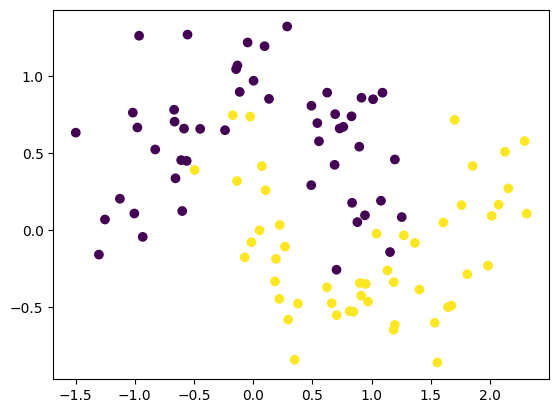

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)

In [4]:
model = Sequential()

model.add(Dense(128,input_dim=2,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
adam = Adam(learning_rate=0.01)

model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

history = model.fit(X,y,epochs=2000,validation_split=0.2,verbose=1)

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.7211 - loss: 0.6168 - val_accuracy: 0.9000 - val_loss: 0.3391
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8523 - loss: 0.4000 - val_accuracy: 0.9000 - val_loss: 0.2302
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8250 - loss: 0.3915 - val_accuracy: 0.9000 - val_loss: 0.2383
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8352 - loss: 0.4134 - val_accuracy: 0.9000 - val_loss: 0.2269
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8305 - loss: 0.3509 - val_accuracy: 0.9000 - val_loss: 0.2460
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8469 - loss: 0.3398 - val_accuracy: 0.9000 - val_loss: 0.2688
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8211 - loss: 0.3620 - val_accuracy: 0.9000 - val_loss: 0.2560
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8289 - loss: 0.3644 - val_accuracy: 0.9000 - 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


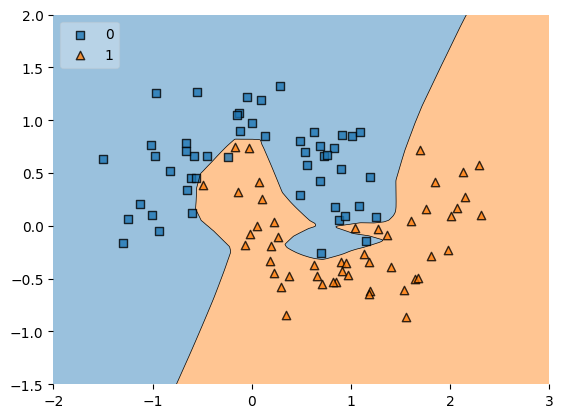

In [6]:
plot_decision_regions(X,y.astype('int'),clf=model,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

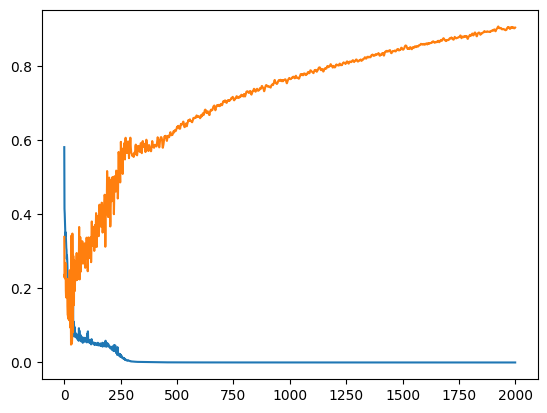

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [8]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model1.add(Dense(128,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
adam = Adam(learning_rate=0.01)

model1.compile(loss='binary_crossentropy',optimizer=adam, metrics=['accuracy'])
history1 = model1.fit(X,y,epochs=2000,validation_split=0.2,verbose=1)

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.5844 - loss: 4.2607 - val_accuracy: 0.9000 - val_loss: 2.7037
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8484 - loss: 2.4783 - val_accuracy: 0.9000 - val_loss: 1.5179
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8406 - loss: 1.4258 - val_accuracy: 0.9000 - val_loss: 0.8906
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8406 - loss: 0.8828 - val_accuracy: 0.9000 - val_loss: 0.6008
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8227 - loss: 0.6934 - val_accuracy: 0.9000 - val_loss: 0.5321
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8391 - loss: 0.6479 - val_accuracy: 0.9000 - val_loss: 0.4922
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7812 - loss: 0.6588 - val_accuracy: 0.9000 - val_loss: 0.5736
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8344 - loss: 0.6445 - val_accuracy: 0.9000 - 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


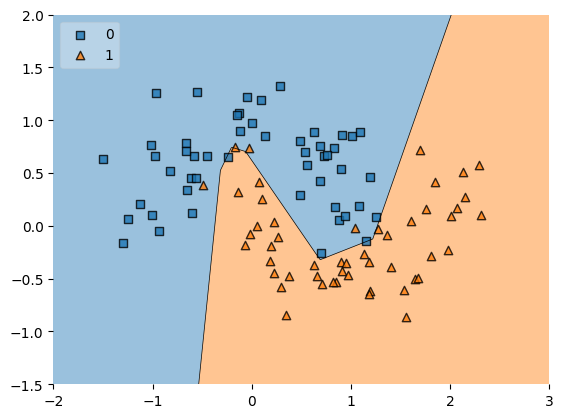

In [10]:
plot_decision_regions(X,y.astype('int'),clf=model1,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

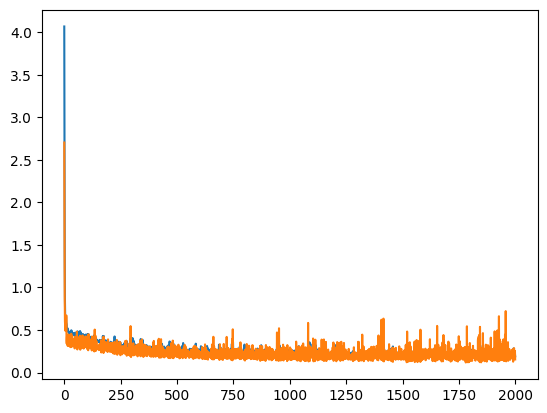

In [11]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [12]:
model_weight_layer_1 = model.get_weights()[0].reshape(256)
model_weight_layer_2 = model1.get_weights()[0].reshape(256)

<Axes: >

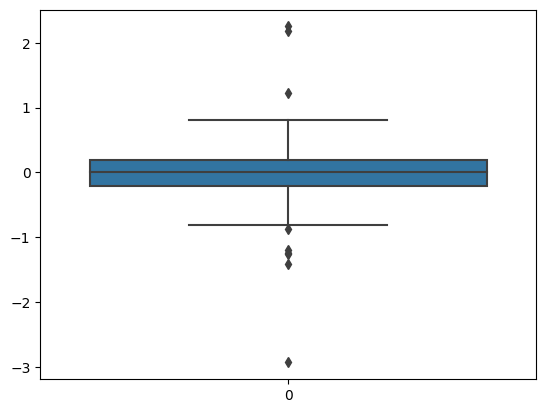

In [13]:
sns.boxplot(model_weight_layer_1)

<Axes: >

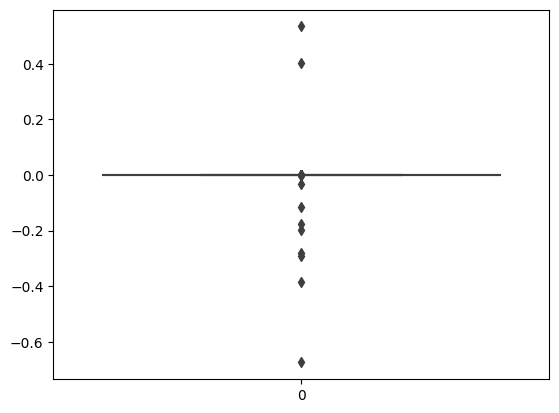

In [14]:
sns.boxplot(model_weight_layer_2)

In [15]:
model_weight_layer_1.min()

-2.934726

In [16]:
model_weight_layer_1.max()

2.2515981

In [17]:
model_weight_layer_2.min()

-0.67487174

In [18]:
model_weight_layer_2.max()

0.5347981

/tmp/ipykernel_19/3969725933.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model_weight_layer_1)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_19/3969725933.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

F

<Axes: ylabel='Density'>

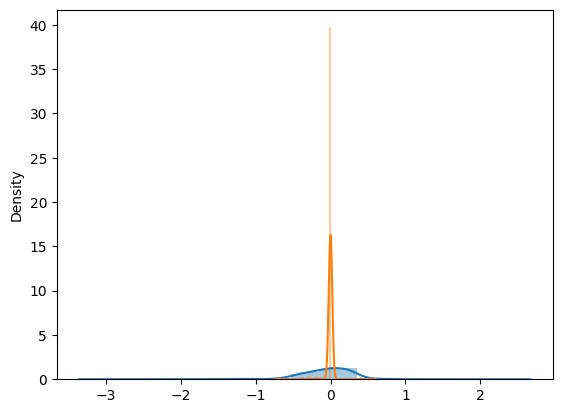

In [19]:
sns.distplot(model_weight_layer_1)
sns.distplot(model_weight_layer_2)